# Математика для анализа данных.
## Урок 3. Градиентный спуск. Регуляризация.

### План занятия

1. Градиентный спуск: SGD + модификации (слайды).

2. LinearRegression vs SGD в Python.

3. Переобучение и регуляризация (слайды, доска).

4. Линейная регрессия с регуляризацией в Python.

## 1-2. Градиентный спуск.

Сгенерируем выборку для задачи регрессии.

In [ ]:
import numpy as np
from matplotlib import pylab as plt
%pylab inline

from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 10000)
print(X.shape, y.shape)

Populating the interactive namespace from numpy and matplotlib
(10000, 100) (10000,)


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


У нас 10000 объектов и 100 признаков. Для начала решим задачу аналитически "из коробки".

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X, y)

print(mean_squared_error(y, lr.predict(X)))

1.0152189687211896e-25


Посмотрим на коэффициенты модели.

In [ ]:
lr.intercept_, lr.coef_[:5]

(2.6645352591003757e-15,
 array([-2.01510768e-14,  6.52811138e-14,  4.97379915e-14,  5.06261699e-14,
         3.19744231e-14]))

Теперь попробуем обучить линейную регрессию методом градиентного спуска "из коробки"

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(alpha=0.00000001)
sgd.fit(X, y)

print(mean_squared_error(y, sgd.predict(X)))

2.01459534463331e-12


In [ ]:
sgd.intercept_, sgd.coef_[:5]

(array([-6.24831975e-08]),
 array([-2.37517073e-08,  2.75929692e-08, -4.18199649e-09, -1.13463303e-08,
         1.18741993e-08]))

## 3-4. Переобучение и регуляризация.

Загрузим один из стандартных датасетов - измеряем уровень сахара в крови.

In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
y[:5]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Разобъем данные на обучающую и тестовую выборки.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=121)

Обучим линейную регрессию и сделаем предсказание, посчитаем MSE.

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred_lr_train = lr.predict(X_train)
pred_lr_test = lr.predict(X_test)

print(mean_squared_error(y_train, pred_lr_train))
print(mean_squared_error(y_test, pred_lr_test))

2797.74646300208
3092.1556922810805


Добавим много-много признаков.

In [ ]:
import copy

cols = copy.deepcopy(X.columns)
print(cols)

for col1 in cols:
    for col2 in cols:
        col_name = col1 + '_x_' + col2
        if col_name not in X.columns:
            X_train[col_name] = X_train[col1]*X_train[col2]
            X_test[col_name] = X_test[col1]*X_test[col2]
X_train.head()

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s6_x_age,s6_x_sex,s6_x_bmi,s6_x_bp,s6_x_s1,s6_x_s2,s6_x_s3,s6_x_s4,s6_x_s5,s6_x_s6
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343,...,0.000657,0.002045,0.000576,0.000049,0.000048,-0.000862,-0.001305,0.001384,0.003024,0.001628
352,0.012648,0.050680,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020289,-0.038357,...,-0.000485,-0.001944,0.002760,0.001802,0.001960,0.003726,-0.004549,0.002930,0.000778,0.001471
120,-0.049105,-0.044642,0.004572,0.011544,-0.037344,-0.018537,-0.017629,-0.002592,-0.039810,-0.021788,...,0.001070,0.000973,-0.000100,-0.000252,0.000814,0.000404,0.000384,0.000056,0.000867,0.000475
359,0.038076,0.050680,0.005650,0.032201,0.006687,0.017475,-0.024993,0.034309,0.014823,0.061054,...,0.002325,0.003094,0.000345,0.001966,0.000408,0.001067,-0.001526,0.002095,0.000905,0.003728
40,0.005383,0.050680,-0.008362,0.021872,0.054845,0.073215,-0.024993,0.034309,0.012553,0.094191,...,0.000507,0.004774,-0.000788,0.002060,0.005166,0.006896,-0.002354,0.003232,0.001182,0.008872


Обучим на расширенном датасете линейную регрессию и сделаем предсказание, вычислим MSE. 

In [ ]:
lr2 = LinearRegression()

lr2.fit(X_train, y_train)

pred_lr_train = lr2.predict(X_train)
pred_lr_test = lr2.predict(X_test)

print(mean_squared_error(y_train, pred_lr_train))
print(mean_squared_error(y_test, pred_lr_test))

2187.3202882242763
3789.966584814086


Получили переобученную модель. Посмотрим еще на веса.

(array([1., 0., 0., 1., 0., 3., 1., 1., 2., 1.]),
 array([-713.21499059, -574.23617335, -435.25735611, -296.27853886,
        -157.29972162,  -18.32090438,  120.65791286,  259.6367301 ,
         398.61554735,  537.59436459,  676.57318183]),
 <a list of 10 Patch objects>)

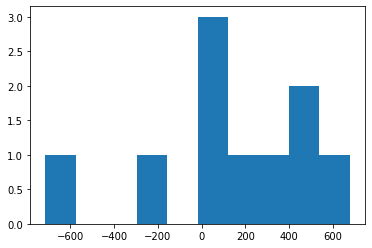

In [ ]:
plt.hist(lr.coef_)

(array([ 4.,  4.,  0., 71., 18.,  9.,  3.,  0.,  0.,  1.]),
 array([-71935.56355737, -53540.01025162, -35144.45694587, -16748.90364012,
          1646.64966563,  20042.20297137,  38437.75627712,  56833.30958287,
         75228.86288862,  93624.41619437, 112019.96950012]),
 <a list of 10 Patch objects>)

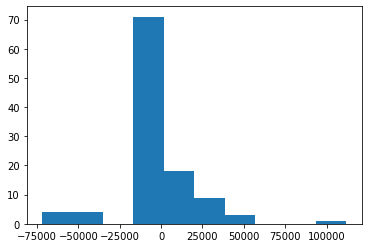

In [ ]:
plt.hist(lr2.coef_)

Обучим линейную регрессию с L1-регуляризацией для разных значений коэффициента регуляризации alpha.

In [ ]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Lasso

for a in np.arange(1e-5, 1.1+1e-5, 0.25):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_train))
    print('Test MSE:', mean_squared_error(y_test, y_pred_test))
    print(lasso.coef_,'\n')

alpha=1e-05
Train MSE: 2214.1980051509327
Test MSE: 3682.661221049689
[ 3.27168705e+01 -2.58922427e+02  5.02582616e+02  3.54358230e+02
 -1.64401952e+02 -1.90535261e+01 -1.89448701e+02  9.63882422e+01
  5.48861716e+02  1.11213548e+02  1.97020459e+03  4.52106011e+03
  3.30443446e+02 -4.40286514e+02 -1.07096632e+03 -2.98325875e+03
  1.93269081e+03  1.18724704e+03  1.51919721e+03  2.64870111e+03
  1.87518230e+02 -0.00000000e+00  1.13267293e+03  1.71419233e+03
  3.48005541e+03 -8.42863824e+03 -0.00000000e+00 -3.77453943e+03
 -0.00000000e+00  1.23652192e+01  1.30429545e+02  1.88323241e+03
  6.89496569e+00  3.91644649e+03 -2.83984557e+03  0.00000000e+00
 -0.00000000e+00 -5.42684790e+03  1.16515234e+01 -0.00000000e+00
 -5.98950591e+02  7.65961451e+02  1.27221962e+03 -1.70556779e+03
  4.15415134e+03 -3.95959244e+03  1.01560222e+03  3.18339180e+02
  0.00000000e+00 -1.17869797e+03 -0.00000000e+00  9.74534099e+03
 -3.67695210e+02  1.02843540e+03  6.02622503e+03 -5.17691296e+03
 -1.07327672e+04 -2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.418e+05, tolerance: 1.906e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Обучим линейную регрессию с L2-регуляризацией для разных значений коэффициента регуляризации alpha.

In [ ]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Ridge

for a in np.arange(1e-5, 1.1+1e-5, 0.25):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)

    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_train))
    print('Test MSE:', mean_squared_error(y_test, y_pred_test))
    print(ridge.coef_,'\n')

alpha=1e-05
Train MSE: 2228.5128669789688
Test MSE: 3599.224665270703
[ 2.97801393e+01 -2.61336233e+02  4.99363042e+02  3.50963908e+02
 -3.11002241e+03  2.57037297e+03  9.20733057e+02  1.07777965e+02
  1.53149322e+03  1.08920600e+02  2.06969317e+03  2.24474005e+03
  1.56171206e+02 -4.58874108e+02 -1.62863156e+01 -1.89784398e+03
  1.15807710e+03  4.60938118e+02  7.49475999e+02  1.32552924e+03
  2.24474005e+03 -1.57807420e+00  1.50856331e+03  1.23669254e+03
  4.02933048e+03 -3.67003569e+03 -2.01138357e+02 -1.58060099e+03
 -1.30022238e+03 -4.24837924e+01  1.56171206e+02  1.50856331e+03
 -1.14491592e+02  2.59658615e+03 -2.11524415e+02  2.70695023e+03
 -1.45784110e+03 -2.76383243e+03 -3.55549233e+02 -1.99379504e+02
 -4.58874108e+02  1.23669254e+03  2.59658615e+03 -1.72543269e+03
  1.33350514e+03 -1.73648811e+03  9.02206274e+02  8.79480827e+02
  1.44629969e+02 -9.77115838e+02 -1.62863156e+01  4.02933048e+03
 -2.11524415e+02  1.33350514e+03  2.66351013e+03  1.36922158e+03
 -3.04485244e+03 -5.